In [1]:
# create adjacency matrix of a weighted directed graph
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# define a function to create random adjacency matrix of a weighted directed graph with n nodes and weights between -10 and 10 with weights less than a threshold set to 0 and diagonal elements zero
def create_adj_matrix(n, threshold):
    # create a random adjacency matrix
    adj_matrix = np.random.rand(n, n) * 20 - 10
    # set the diagonal elements to zero
    np.fill_diagonal(adj_matrix, 0)
    # set the weights less than threshold to zero
    adj_matrix[abs(adj_matrix) < threshold] = 0
    # return the adjacency matrix
    return adj_matrix


#  define a function to plot the graph
def plot_graph(adj_matrix):
    G = nx.from_numpy_matrix(adj_matrix)
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0]
    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=7)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="b", width=0.1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.1, alpha=0.5, edge_color="r", style="dashed")
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()


# define a function to compute the maximum and minimum eigenvalues of the adjacency matrix
def compute_eigenvalues(adj_matrix):
    # compute the maximum eigenvalue of the adjacency matrix
    max_eig = np.max(np.linalg.eigvals(adj_matrix))
    # compute the minimum eigenvalue of the adjacency matrix
    min_eig = np.min(np.linalg.eigvals(adj_matrix))
    # return the maximum and minimum eigenvalues
    return max_eig, min_eig

# Numerical experiments for 2-layered multiplex networks

In [ ]:
# creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
adj_matrix1 = create_adj_matrix(50, 0.2)
adj_matrix2 = create_adj_matrix(50, 0.5)

# plot the first layer
plot_graph(adj_matrix1)
# plot the second layer
plot_graph(adj_matrix2)

# creating interlayer relations betweek layers, this would be identity matrix since we want to connect each node in the first layer to each node in the second layer
interlayer_relations = np.identity(50)

# creating the adjacency matrix of the whole graph
adj_matrix = np.block([[adj_matrix1, interlayer_relations], [interlayer_relations, adj_matrix2]])

# plot inter`layer relations
plot_graph(interlayer_relations)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


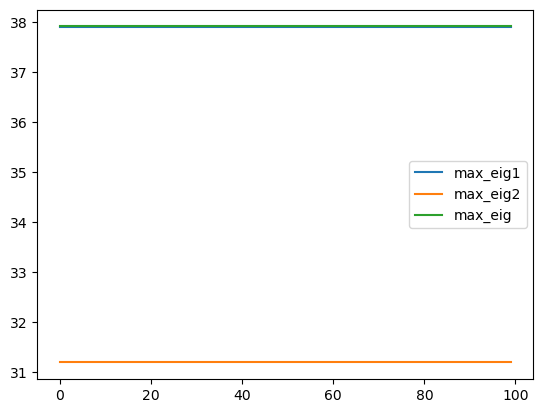

In [51]:
# compute the maximum and minimum eigenvalues of each layer and the whole graph
list_A = []
list_A11 = []
list_A22 = []
list_A33 = []
comb = []
diff1 = []
diff2 = []

for i in range(100):
    # generating 100 multiplex networks with 50 nodes in each layer and 0.2 probability of zero elements for the first one and 0.5 for the second one
    adj_matrix1 = create_adj_matrix(50, 0.2)
    adj_matrix2 = create_adj_matrix(50, 0.5)
    # creating interlayer relations betweek layers, this would be identity matrix since we want to connect each node in the first layer to each node in the second layer
